<a href="https://colab.research.google.com/github/szm111/excel-llm/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 概述
这个notebook主要是使用了langchain中的pandas dataframe agent。将excel中的数据读入pandas dp后，使用该agent来进行具体的数据处理，它的底层其实是一个python agent，用来执行llm返回的python代码

# 事前准备
首先进行基本包的安装

In [1]:
!pip install langchain
!pip install openai
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 551.5 kB/s eta 0:00:00


接下来安装大概率会使用到的工具类

In [ ]:
!pip install scikit-learn
!pip install matplotlib

import一些基本的lib

In [2]:
import langchain
import os
import pandas as pd

from getpass import getpass
from langchain.agents.agent_toolkits.pandas.base import create_pandas_dataframe_agent
from langchain.chains import LLMChain
from langchain.llms import OpenAI


输入openai api key

In [3]:
os.environ["OPENAI_API_KEY"] = getpass()

··········


上传需要处理的excel file或者直接使用default的movielens data

In [4]:
# You can use the following commented out code to upload your own file
# from google.colab import files
# uploaded = files.upload()
# df = None
# filename = list(uploaded.keys())[0]
# if filename.endswith('xlsx'):
#   df = pd.read_excel(filename)
# elif filename.endswith('csv'):
#   df = pd.read_csv(filename)
# else:
#   raise ValueError('Please upload excel file')

url = 'https://github.com/szm111/excel-llm/raw/main/data.xlsx'
df = pd.read_excel(url)

初始化agent

In [5]:
llm = OpenAI(temperature=0,max_retries=10)
agent = create_pandas_dataframe_agent(llm, df, verbose=True)

# 具体处理
用这个pandas agent我们就可以使用自然语言的方式对excel数据进行一系列的处理，下面是一些具体的例子
## 缺失值填充

In [ ]:
df['rating'][10] = float('NaN')
print(df['rating'][:11])
agent.run("对rating的缺失值用平均值进行填补")

0     3.0
1     3.0
2     1.0
3     2.0
4     1.0
5     4.0
6     2.0
7     5.0
8     3.0
9     3.0
10    NaN
Name: rating, dtype: float64


> Entering new AgentExecutor chain...
Thought: 我需要计算rating的平均值
Action: python_repl_ast
Action Input: df['rating'].mean()
Observation: 3.5298752987529873
Thought: 我现在知道了rating的平均值，我可以用它来填补缺失值
Action: python_repl_ast
Action Input: df['rating'].fillna(df['rating'].mean(), inplace=True)
Observation: 
Thought: 我现在已经完成了对rating的缺失值的填补
Final Answer: 对rating的缺失值用平均值进行填补

> Finished chain.


'对rating的缺失值用平均值进行填补'

In [ ]:
print(df['rating'][:11])

0     3.000000
1     3.000000
2     1.000000
3     2.000000
4     1.000000
5     4.000000
6     2.000000
7     5.000000
8     3.000000
9     3.000000
10    3.529875
Name: rating, dtype: float64


## 归一化处理

In [ ]:
agent.run("这是一个表格，对rating列做归一化处理，并显示前10行")



> Entering new AgentExecutor chain...
Thought: 我需要先把rating列归一化，然后再显示前10行
Action: python_repl_ast
Action Input: df['rating'] = (df['rating'] - df['rating'].min()) / (df['rating'].max() - df['rating'].min())
Observation: 
Thought:

error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 8.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


 我现在需要显示前10行
Action: python_repl_ast
Action Input: print(df.head(10))
Observation:    user id  item id  rating  timestamp
0      196      242    0.50  881250949
1      186      302    0.50  891717742
2       22      377    0.00  878887116
3      244       51    0.25  880606923
4      166      346    0.00  886397596
5      298      474    0.75  884182806
6      115      265    0.25  881171488
7      253      465    1.00  891628467
8      305      451    0.50  886324817
9        6       86    0.50  883603013

Thought:

error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 8.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


 我现在已经得到了最终答案
Final Answer: 对rating列做归一化处理后，前10行的数据为：
    user id  item id  rating  timestamp
0      196      242    0.50  881250949
1      186      302    0.50  891717742
2       22      377    0.00  878887116
3      244       51    0.25  880606923
4      166      346    0.00  886397596
5      298      474    0.75  884182806
6      115      265    0.25  881171488
7      253      465    1.00  891628467
8      305      451    0.50  886324817
9        6       86    0.50  883603013

> Finished chain.


'对rating列做归一化处理后，前10行的数据为：\n    user id  item id  rating  timestamp\n0      196      242    0.50  881250949\n1      186      302    0.50  891717742\n2       22      377    0.00  878887116\n3      244       51    0.25  880606923\n4      166      346    0.00  886397596\n5      298      474    0.75  884182806\n6      115      265    0.25  881171488\n7      253      465    1.00  891628467\n8      305      451    0.50  886324817\n9        6       86    0.50  883603013'

## PCA降维

In [ ]:
agent.run("对user id和item id做pca降维处理，将结果放在pca列")



> Entering new AgentExecutor chain...
Thought: 需要先把user id和item id转换成数值型
Action: python_repl_ast
Action Input: df['user id'] = df['user id'].astype('int64')
Observation: 
Thought: 再把item id转换成数值型
Action: python_repl_ast
Action Input: df['item id'] = df['item id'].astype('int64')
Observation: 
Thought: 用sklearn的PCA函数进行降维
Action: python_repl_ast
Action Input: from sklearn.decomposition import PCA
Observation: 
Thought:

error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 8.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


 定义PCA函数
Action: python_repl_ast
Action Input: pca = PCA(n_components=1)
Observation: 
Thought:

error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 8.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


 将user id和item id输入PCA函数
Action: python_repl_ast
Action Input: pcr = pca.fit_transform(df[['user id', 'item id']])
Observation: 
Thought:

error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


 将结果放在pcr列
Action: python_repl_ast
Action Input: df['pcr'] = pcr
Observation: 
Thought:

error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 8.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


 I now know the final answer
Final Answer: 将pca降维处理的结果放在pcr列

> Finished chain.


'将pca降维处理的结果放在pcr列'

In [ ]:
print(df['pca'][:10])

0   -189.832984
1   -130.088525
2    -59.020878
3   -379.633975
4    -86.577993
5     44.533502
6   -168.771189
7     34.462914
8     21.706977
9   -350.319682
Name: pcr, dtype: float64


## 画图



> Entering new AgentExecutor chain...
Thought: 我需要知道rating的分布
Action: python_repl_ast
Action Input: df['rating'].value_counts().plot(kind='bar')
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: 我现在知道最终答案
Final Answer: rating的分布图

> Finished chain.


'rating的分布图'

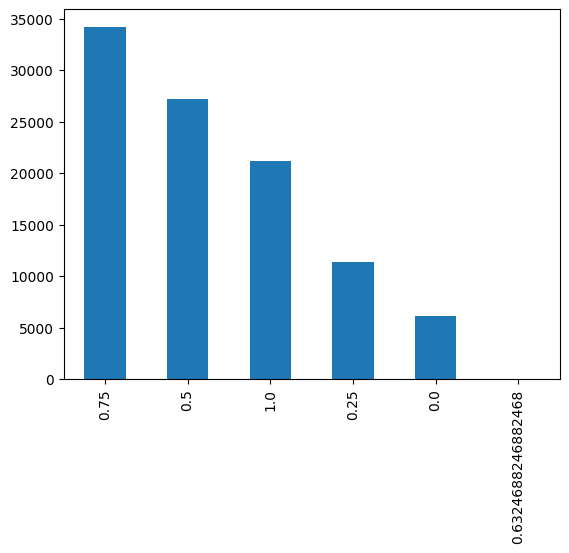

In [ ]:
agent.run("画出rating的分布")

到这里位置，它已经可以接受自然语言输入并进行比较基本的文本处理，包括数据清洗，特征工程，因子分析，画图等功能。

#进阶处理
## 添加memory
上面实现的内容基本只能进行相对比较简单的处理，而且对于比较复杂的工程可能使用起来不是那么的方便，可能需要用户在一次run中把任务描述完。即使可以把临时数据也放入dp中，也会要求用户在跑新的run之前复述context。这是由于default的pandas agent是没有memory的，那么下一步的工作也就是把memory也给加上，从而可以实现更加复杂的工程和更加便利的使用。

In [ ]:
from langchain.memory import ConversationBufferMemory

PREFIX = """
You are working with a pandas dataframe in Python. The name of the dataframe is `df`.
You should use the tools below to answer the question posed of you:

Last few messages between you and user:
{chat_history_buffer}
"""

memory = ConversationBufferMemory(
    memory_key="chat_history_buffer",
    input_key="input"
    )

agent = create_pandas_dataframe_agent(
    llm,
    df,
    prefix=PREFIX,
    verbose=True,
    agent_executor_kwargs={"memory": memory},
    input_variables=['df_head', 'input', 'agent_scratchpad', 'chat_history_buffer']
    )

这样我们就可以step by step的处理一些更加复杂的逻辑

In [ ]:
agent.run("对user id和item id做pca降维处理，将结果放在pca列")



> Entering new AgentExecutor chain...
Thought: 需要使用pca函数
Action: python_repl_ast
Action Input: from sklearn.decomposition import PCA
Observation: 
Thought: 需要把user id和item id放在一个数组中
Action: python_repl_ast
Action Input: data = df[['user id', 'item id']].values
Observation: 
Thought: 需要实例化一个pca对象
Action: python_repl_ast
Action Input: pca = PCA(n_components=1)
Observation: 
Thought:

error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 8.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


 需要把数据传入pca对象
Action: python_repl_ast
Action Input: pca.fit(data)
Observation: PCA(n_components=1)
Thought:

error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 8.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


 需要把降维后的结果放入df
Action: python_repl_ast
Action Input: df['pca'] = pca.transform(data)
Observation: 
Thought:

error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 8.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


 I now know the final answer
Final Answer: df['pca']已经包含了user id和item id的pca降维处理结果

> Finished chain.


"df['pca']已经包含了user id和item id的pca降维处理结果"

In [ ]:
agent.run("将上一步的结果做归一化处理")



> Entering new AgentExecutor chain...
Thought: 需要使用python_repl_ast来执行python命令
Action: python_repl_ast
Action Input: df['pca'] = (df['pca'] - df['pca'].min()) / (df['pca'].max() - df['pca'].min())
Observation: 
Thought: 已经完成归一化处理
Final Answer: df['pca']已经完成归一化处理

> Finished chain.


"df['pca']已经完成归一化处理"

## 自动安装找不到的python module
有些时候在python找不到对应module的时候agent会去尝试安装，但是因为一直尝试run pip install反复失败而陷入死循环。简单的解决方法自然是停下后手动安装。但是我们也可以对此进行优化。
思路有两种，一种是在instruction的时候，告诉llm去用pip.main(["install",package]) 去代替pip install。还有一种是加入别的可以跑pip install的tool，比如shell tool到我们的agent中去。这里我主要尝试的是第一种。

In [12]:
from langchain.memory import ConversationBufferMemory

PREFIX = """
You are working with a pandas dataframe in Python. The name of the dataframe is `df`.
You should use the tools below to answer the question posed of you:

Last few messages between you and user:
{chat_history_buffer}

Please use import pip;pip.main(['install','package']) instead of pip install package.
You need to use scikit-learn instead of sklearn while doing installation.
"""

memory = ConversationBufferMemory(
    memory_key="chat_history_buffer",
    input_key="input"
    )

agent = create_pandas_dataframe_agent(
    llm,
    df,
    prefix=PREFIX,
    verbose=True,
    agent_executor_kwargs={"memory": memory},
    input_variables=['df_head', 'input', 'agent_scratchpad', 'chat_history_buffer']
    )

In [13]:
!pip uninstall -y scikit-learn

In [14]:
agent.run("对user id和item id做pca降维处理")



> Entering new AgentExecutor chain...
Thought: 首先需要把user id和item id转换成数字
Action: python_repl_ast
Action Input: df['user id'] = df['user id'].astype('int64')
Observation: 
Thought: 把item id也转换成数字
Action: python_repl_ast
Action Input: df['item id'] = df['item id'].astype('int64')
Observation: 
Thought:

 现在可以使用pca降维处理
Action: python_repl_ast
Action Input: from sklearn.decomposition import PCA
Observation: ModuleNotFoundError: No module named 'sklearn'
Thought:

 需要使用scikit-learn
Action: python_repl_ast
Action Input: import pip;pip.main(['install','scikit-learn'])

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting scikit-learn

Downloading scikit_learn-1.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)

Output()

Requirement already satisfied: numpy>=1.17.3 in /usr/local/lib/python3.10/dist-packages (from scikit-learn) (1.22.4)

Requirement already satisfied: scipy>=1.5.0 in /usr/local/lib/python3.10/dist-packages (from scikit-learn) (1.10.1)

Requirement already satisfied: joblib>=1.1.1 in /usr/local/lib/python3.10/dist-packages (from scikit-learn) (1.3.1)

Requirement already satisfied: threadpoolctl>=2.0.0 in /usr/local/lib/python3.10/dist-packages (from scikit-learn) (3.2.0)

Installing collected packages: scikit-learn

Successfully installed scikit-learn-1.3.0


Observation: 0
Thought:

error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


 再次尝试使用pca降维处理
Action: python_repl_ast
Action Input: from sklearn.decomposition import PCA
Observation: 
Thought:

error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


 现在可以使用pca降维处理
Action: python_repl_ast
Action Input: pca = PCA(n_components=2)
Observation: 
Thought:

error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 8.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


 将user id和item id转换成降维后的数据
Action: python_repl_ast
Action Input: df_pca = pca.fit_transform(df[['user id', 'item id']])
Observation: 
Thought:

error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 8.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


 I now know the final answer
Final Answer: 通过使用scikit-learn的PCA函数，可以将user id和item id转换成降维后的数据。

> Finished chain.


'通过使用scikit-learn的PCA函数，可以将user id和item id转换成降维后的数据。'

# 多表工作
pandas agent也支持输入多个df表，从而可以从事一些多表的工作。

In [19]:
from langchain.memory import ConversationBufferMemory

MULTI_DF_PREFIX = """
You are working with {num_dfs} pandas dataframes in Python named df1, df2, etc. You
should use the tools below to answer the question posed of you:

Last few messages between you and user:
{chat_history_buffer}

Please use import pip;pip.main(['install','package']) instead of pip install package.
You need to use scikit-learn instead of sklearn while doing installation.
"""

df2 = df.copy()

memory = ConversationBufferMemory(
    memory_key="chat_history_buffer",
    input_key="input"
    )

agent = create_pandas_dataframe_agent(
    llm,
    [df, df2],
    prefix=MULTI_DF_PREFIX,
    verbose=True,
    agent_executor_kwargs={"memory": memory},
    input_variables=['dfs_head', 'num_dfs', 'input', 'agent_scratchpad', 'chat_history_buffer']
    )

In [20]:
agent.run({'input':'以user id和item id作为key，将两个表的rating相加，放在df1中的rating sum列','num_dfs':2})



> Entering new AgentExecutor chain...
Thought: 我需要将两个表合并
Action: python_repl_ast
Action Input: df1.merge(df2, on=['user id', 'item id'], how='left')
Observation:        user id  item id  rating_x  timestamp_x  rating_y  timestamp_y
0          196      242         3    881250949         3    881250949
1          186      302         3    891717742         3    891717742
2           22      377         1    878887116         1    878887116
3          244       51         2    880606923         2    880606923
4          166      346         1    886397596         1    886397596
...        ...      ...       ...          ...       ...          ...
99995      880      476         3    880175444         3    880175444
99996      716      204         5    879795543         5    879795543
99997      276     1090         1    874795795         1    874795795
99998       13      225         2    882399156         2    882399156
99999       12      203         3    879959583         3    879959

error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 8.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per day. Limit: 200 / day. Please try again in 7m12s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 10.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per day. Limit: 200 / day. Please try again in 7m12s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 10.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per day. Limit: 200 / day. Please try again in 7m12s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 10.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per day. Limit: 200 / day. Please try again in 7m12s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 10.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per day. Limit: 200 / day. Please try again in 7m12s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

WARNING: Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 10.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per day. Limit: 200 / day. Please try again in 7m12s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


error_code=rate_limit_exceeded error_message='Rate limit reached for default-text-davinci-003 in organization org-UoIVpCT3QsCucW8AtM9bEvZu on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.' error_param=None error_type=requests message='OpenAI API error received' stream_error=False

RateLimitError: ignored

#保存结果

In [17]:
from google.colab import files
df.to_excel('final.xlsx')
files.download('final.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 未来工作
时间有限外加qps有限，暂时只能做到这个程度了。

当前最大的问题还是将excel存在内存中进行处理，对于过大的文件无法使用，可以考虑进行chunk后进行处理。但是很有可能治标不治本。现在的想法是抛弃pandas agent，转而直接输入文件名或者迭代器来进行处理。